In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.random.seed(1)
X = np.random.rand(2, 10).T
y = np.array([1, -1, -1, -1, -1, -1, 1, 1, 1, 1])

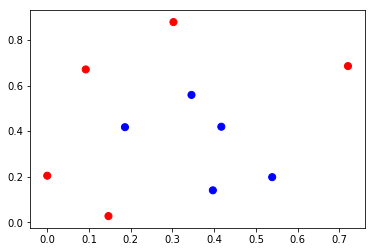

In [3]:
def plot_data(X, y, w=None):
    if w is None:
        w = np.array([1/len(y)]*len(y))
    plt.scatter(X[y==1, 0], X[y==1, 1], c='b', s=w[y==1]*500)
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='r', s=w[y==-1]*500)
    plt.show()
plot_data(X, y)

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import reg_helper as RHelper

Using TensorFlow backend.


In [5]:
dt_clf = DecisionTreeClassifier(max_depth=1, criterion='entropy')

In [6]:
dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

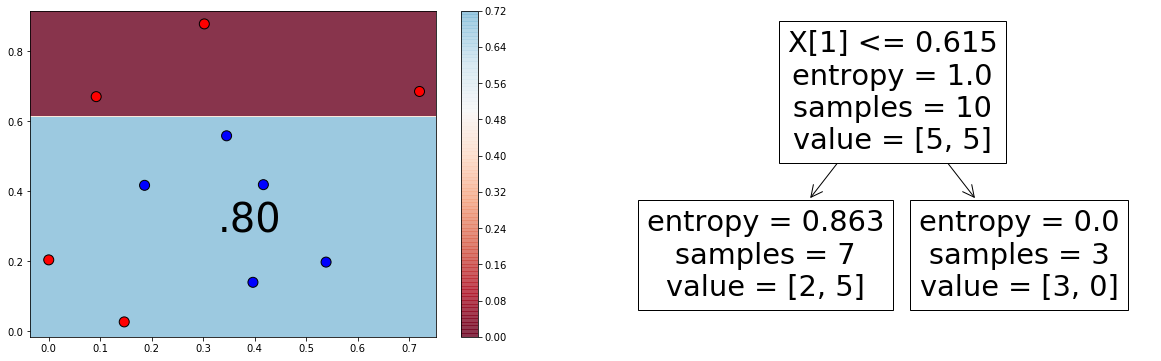

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf.score(X, y), dt_clf.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
plot_tree(dt_clf, ax=ax2)
plt.show()

Pesos iniciales:
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
predicciones y errores:
[ 1 -1  1 -1  1 -1  1  1  1  1]
[ 1  1 -1  1 -1  1  1  1  1  1]
error: 0.2
alpha: 0.6931471805599453
Pesos recalculados con el error:
[0.05 0.05 0.2  0.05 0.2  0.05 0.05 0.05 0.05 0.05]
Pesos normalizados:
[0.0625 0.0625 0.25   0.0625 0.25   0.0625 0.0625 0.0625 0.0625 0.0625]


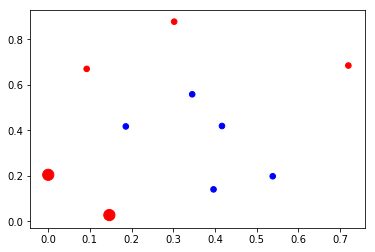

In [8]:
def calculate_adaboost(X, y, weights, dt_clf):
    print('Pesos iniciales:')
    print(weights)
    predictions = dt_clf.predict(X)
    print(f'predicciones y errores:')
    print(predictions)
    errors = (predictions == y)*2 - 1
    print(errors)
    p = np.sum((predictions != y) * weights)
    print(f'error: {p}')
    say_amount = 0.5*np.log((1-p)/p)
    print(f'alpha: {say_amount}')

    weights = weights*np.exp(-say_amount*errors)
    print('Pesos recalculados con el error:')
    print(weights)
    print('Pesos normalizados:')
    weights = weights/weights.sum()
    print(weights)
    plot_data(X, y, weights)
    plt.show()
    return weights, say_amount
weights = np.array([1/len(X)]*len(X))
weights, alpha1 = calculate_adaboost(X, y, weights, dt_clf)

In [9]:
np.random.seed(42)
samples = np.random.choice(range(len(X)), size=len(X) ,p=weights)
print(samples)

[2 9 5 4 2 2 0 7 4 5]


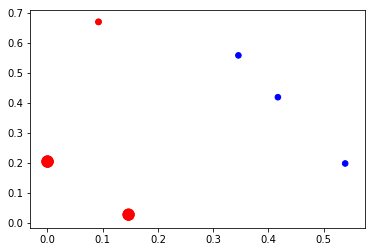

In [10]:
plot_data(X[samples], y[samples], weights[samples])

In [11]:
dt_clf_2 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_clf_2.fit(X[samples], y[samples])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

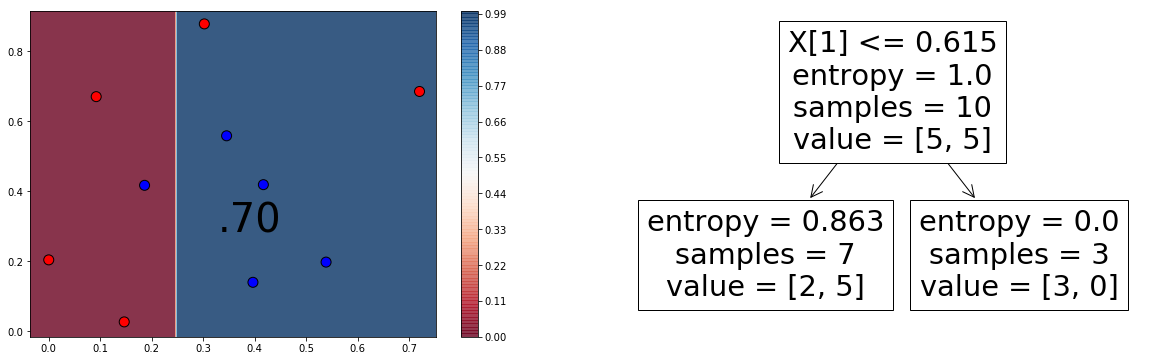

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf_2.score(X, y), dt_clf_2.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
plot_tree(dt_clf, ax=ax2)
plt.show()

Pesos iniciales:
[0.0625 0.0625 0.25   0.0625 0.25   0.0625 0.0625 0.0625 0.0625 0.0625]
predicciones y errores:
[ 1  1 -1  1 -1 -1 -1  1  1  1]
[ 1 -1  1 -1  1  1 -1  1  1  1]
error: 0.1875
alpha: 0.7331685343967135
Pesos recalculados con el error:
[0.03002403 0.13010412 0.12009612 0.13010412 0.12009612 0.03002403
 0.13010412 0.03002403 0.03002403 0.03002403]
Pesos normalizados:
[0.03846154 0.16666667 0.15384615 0.16666667 0.15384615 0.03846154
 0.16666667 0.03846154 0.03846154 0.03846154]


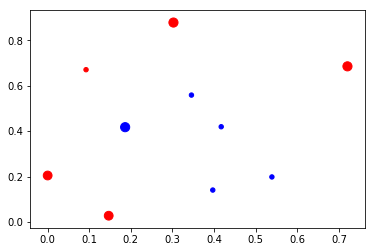

In [13]:
weights, alpha2 = calculate_adaboost(X, y, weights, dt_clf_2)

In [14]:
np.random.seed(18)
samples = np.random.choice(range(len(X)), size=len(X) ,p=weights)
print(samples)

[4 3 6 1 6 6 4 9 2 0]


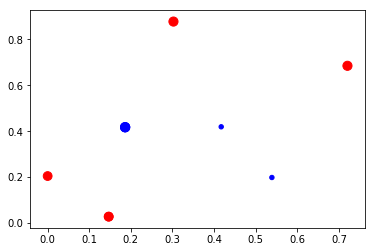

In [15]:
plot_data(X[samples], y[samples], weights[samples])

In [145]:
dt_clf_3 = DecisionTreeClassifier(max_depth=1, criterion='entropy')
dt_clf_3.fit(X[samples], y[samples])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

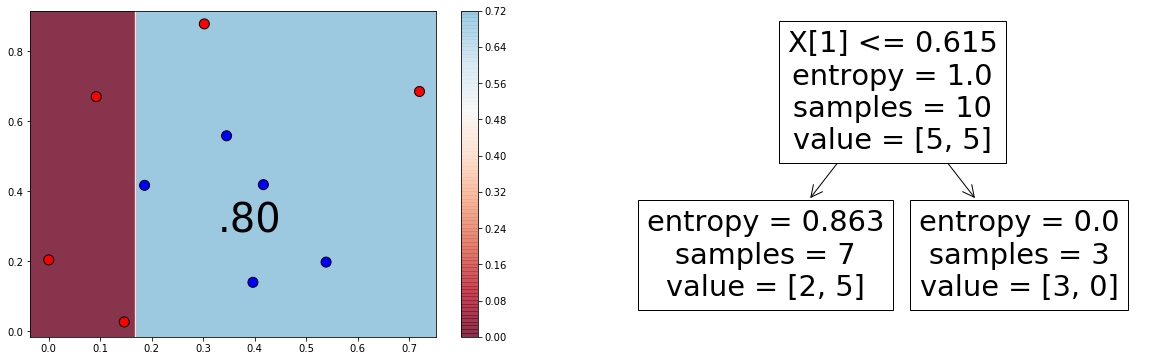

In [146]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X, y, dt_clf_3.score(X, y), dt_clf_3.predict_proba,  mesh_res=200, ax=ax1, bound_line=False)
plot_tree(dt_clf, ax=ax2)
plt.show()

In [147]:
say_amount*dt_clf.predict(X) + say_amount_2*dt_clf_2.predict(X)>0

array([ True,  True, False,  True, False, False, False,  True,  True,
        True])

In [48]:
predict_1 = dt_clf.predict(X)
predict_2 = dt_clf_2.predict(X)
print(predict_1*say_amount)
print(predict_2*say_amount_2)
print(2*((say_amount*(predict_1==1) + (predict_2==1)*say_amount_2)>0) - 1)
print(y)

[ 0.69314718 -0.69314718  0.69314718 -0.69314718  0.69314718 -0.69314718
  0.69314718  0.69314718  0.69314718  0.69314718]
[ 0.73316853  0.73316853 -0.73316853  0.73316853 -0.73316853 -0.73316853
 -0.73316853  0.73316853  0.73316853  0.73316853]
[ 1  1  1  1  1 -1  1  1  1  1]
[ 1 -1 -1 -1 -1 -1  1  1  1  1]


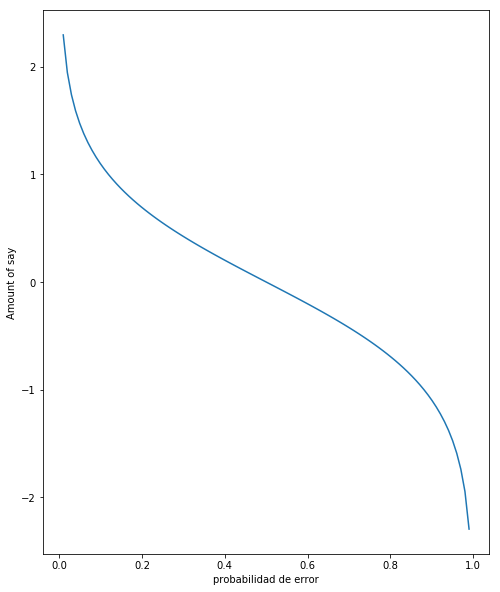

In [118]:
plt.figure(figsize=(8, 10))
t = np.linspace(0.01, 0.99, 100)
plt.plot(t, 0.5*np.log((1-t)/t))
plt.xlabel('probabilidad de error')
plt.ylabel('Amount of say')
plt.show()